In [3]:
import pandas as pd
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression as mi_reg
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
def load_files(background='../FFChallenge_v5/background.csv',train='../FFChallenge_v5/train.csv',
               nanvalues='keep'):
    
    if nanvalues == 'remove':
        nanvalues = [-9,-8,-7,-6,-5,-3,-2,-1]
    elif nanvalues == 'keep':
        nanvalues = None


    background = pd.read_csv(background,low_memory=False, \
                             na_values=nanvalues)#,\
                               

    train = pd.read_csv(train, sep=',', header=0, index_col=0).dropna(how='all')
    
    data  = background.loc[train.index].join(train)

    return data

In [ ]:
df = load_files(nanvalues='keep')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 6 to 4241
Columns: 13033 entries, challengeID to jobTraining
dtypes: float64(550), int64(12367), object(116)
memory usage: 145.8+ MB


In [ ]:
# label encoder to convert categorical to numeric
le = LabelEncoder()
df = df.apply(le.fit_transform)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 6 to 4241
Columns: 13033 entries, challengeID to jobTraining
dtypes: int64(13033)
memory usage: 145.8 MB


In [ ]:
df.sample(5)

,challengeID,cf1intmon,cf1intyr,cf1lenhr,cf1lenmin,cf1twoc,cf1fint,cf1natsm,f1natwt,cf1natsmx,...,m5d20,m5k10,f5c6,k5f1,gpa,grit,materialHardship,eviction,layoff,jobTraining
challengeID,,,,,,,,,,,,,,,,,,,,,
2796,978,0,0,3,27,0,1,0,0,0,...,0,0,188,5,7,11,0,0,0,0
3020,1058,0,0,3,32,0,1,0,0,0,...,0,0,188,224,13,9,1,0,2,0
2317,803,0,0,3,37,0,1,0,0,0,...,0,0,82,0,5,7,4,1,0,0
1485,527,0,0,3,27,0,1,0,0,0,...,0,0,188,224,8,7,0,0,0,0
2140,749,0,0,0,0,0,0,0,0,0,...,0,0,188,224,3,7,0,0,0,0


# Export MI matrix

In [ ]:
# targets = ['gpa','grit','materialHardship','eviction','layoff','jobTraining']

# mi_data = []

# def get_miscore(df,targets=['gpa','grit','materialHardship','eviction','layoff','jobTraining']):
#     X = df.drop(targets,axis=1)
#     for target in targets:
#         print(target)
#         entry = {}
#         Y = df[target]
#         mi_scores = mi_reg(X,Y)
#         entry[target] = mi_scores
#         mi_data.append(mi_scores)
#     return pd.DataFrame(mi_data,index=targets,columns=X.columns)

# miscores = get_miscore(df).T

gpa
grit
materialHardship
eviction
layoff
jobTraining


In [ ]:
# miscores.to_csv('miscores.csv')

In [ ]:
# miscores

,gpa,grit,materialHardship,eviction,layoff,jobTraining
challengeID,0.030627,0.013651,0.000000,0.000000,0.000000,0.000000
cf1intmon,0.000000,0.001006,0.000000,0.000000,0.000000,0.025986
cf1intyr,0.000000,0.000000,0.004797,0.052408,0.000000,0.000000
cf1lenhr,0.000000,0.000000,0.000000,0.000000,0.000000,0.066648
cf1lenmin,0.000000,0.008783,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
m5c6,0.011083,0.000000,0.000000,0.000000,0.000000,0.000000
m5d20,0.000000,0.000000,0.007177,0.000000,0.022011,0.000000
m5k10,0.000119,0.000000,0.029275,0.005805,0.001874,0.000000
f5c6,0.000000,0.000000,0.012009,0.000000,0.010909,0.000000


# Calculate MI matrix

In [ ]:
miscores  = pd.read_csv('miscores.csv',index_col=0)

In [ ]:
predictors  = {}
for t in miscores.columns:
    predictors[t] = miscores[miscores[t] != 0].index.to_list()


In [ ]:
miscores.index

Index(['challengeID', 'cf1intmon', 'cf1intyr', 'cf1lenhr', 'cf1lenmin',
       'cf1twoc', 'cf1fint', 'cf1natsm', 'f1natwt', 'cf1natsmx',
       ...
       'm4d9', 'm4e23', 'f4d6', 'f4d7', 'f4d9', 'm5c6', 'm5d20', 'm5k10',
       'f5c6', 'k5f1'],
      dtype='object', length=13027)

In [ ]:
# X = df.dropna()
# targets = ['gpa','grit','materialHardship','eviction','layoff','jobTraining']
# mi_data = []

# for col in miscores.index:
#     row = []
#     for target in targets:
#         mi_value = mi_reg(X[col].values.reshape(-1,1),X[target].values.reshape(-1,1))[0]
#         row.append(mi_value)
#     mi_data.append(row)

# midf = pd.DataFrame(mi_data,columns=targets)
    
# midf

In [ ]:
miscores

# Histogram of MI for each target variable

<Axes: >

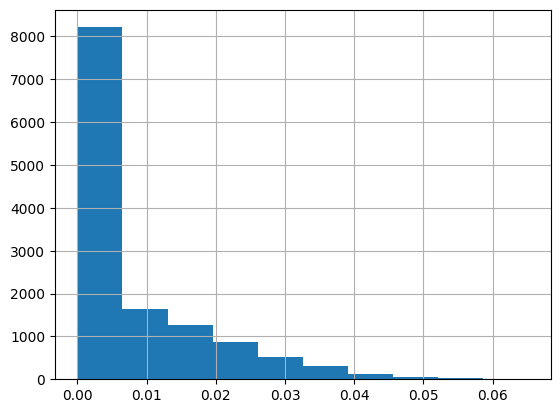

In [ ]:
miscores.grit.hist()

<Axes: >

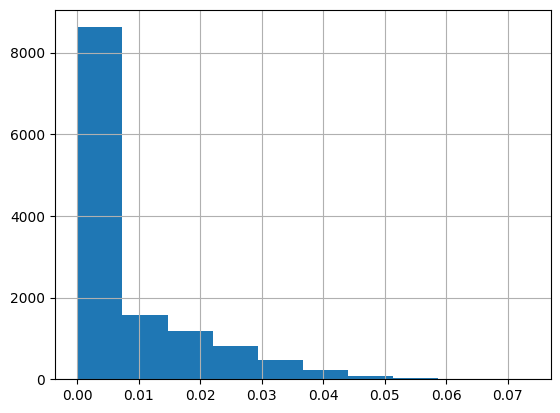

In [ ]:
miscores.materialHardship.hist()

<Axes: >

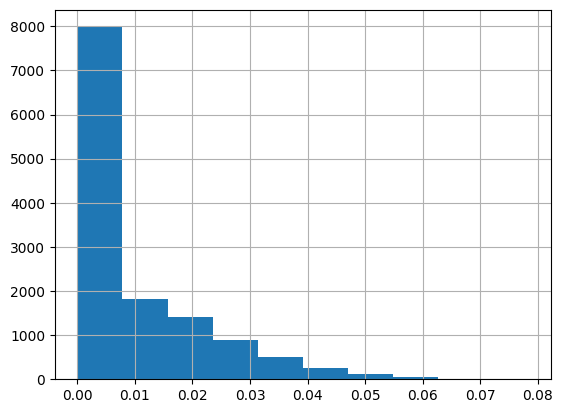

In [ ]:
miscores.jobTraining.hist()

<Axes: >

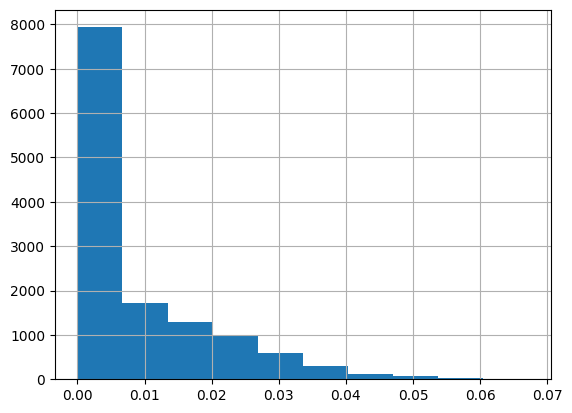

In [ ]:
miscores.gpa.hist()

<Axes: >

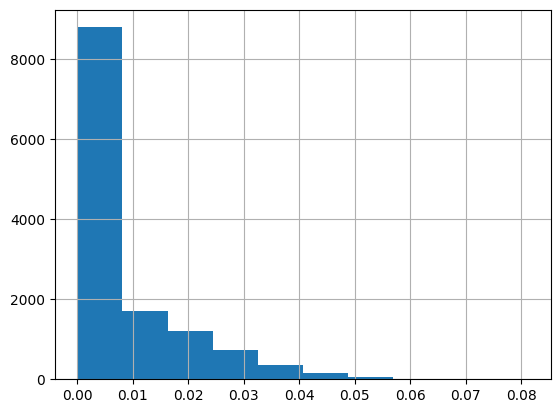

In [ ]:
miscores.layoff.hist()

<Axes: >

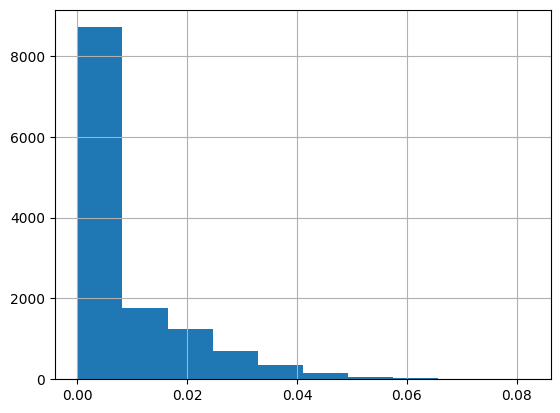

In [ ]:
miscores.eviction.hist()

In [ ]:
miscores

,gpa,grit,materialHardship,eviction,layoff,jobTraining
challengeID,0.030627,0.013651,0.000000,0.000000,0.000000,0.000000
cf1intmon,0.000000,0.001006,0.000000,0.000000,0.000000,0.025986
cf1intyr,0.000000,0.000000,0.004797,0.052408,0.000000,0.000000
cf1lenhr,0.000000,0.000000,0.000000,0.000000,0.000000,0.066648
cf1lenmin,0.000000,0.008783,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
m5c6,0.011083,0.000000,0.000000,0.000000,0.000000,0.000000
m5d20,0.000000,0.000000,0.007177,0.000000,0.022011,0.000000
m5k10,0.000119,0.000000,0.029275,0.005805,0.001874,0.000000
f5c6,0.000000,0.000000,0.012009,0.000000,0.010909,0.000000


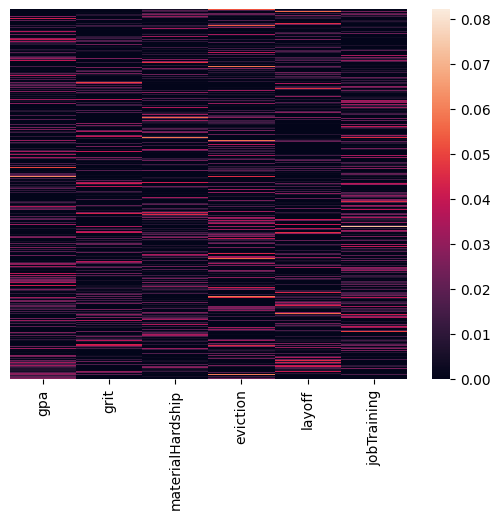

In [ ]:
sns.heatmap(miscores)
# disable y labels
plt.yticks([])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 6 to 4241
Columns: 13033 entries, challengeID to jobTraining
dtypes: int64(13033)
memory usage: 145.8 MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 6 to 4241
Columns: 13033 entries, challengeID to jobTraining
dtypes: int64(13033)
memory usage: 145.8 MB


In [ ]:
from sklearn.feature_selection import mutual_info_regression

# numeric_features = cols_per_type(X_train, 'Continuous')


def make_mi_scores(df, target, discrete_features):
    X = df.drop(target, axis=1)
    y = df[target]
    # assert both do not have strings
    assert (X.dtypes != 'object').all()
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# make_mi_scores(df[['cf1citsm','f1a5']], df.gpa, discrete_features)

make_mi_scores(df, 'gpa', discrete_features)

/home/abitporu/Documents/fragile_famile/exploring/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

In [ ]:

tqdm().pandas()

targets=['gpa','grit','materialHardship','eviction','layoff','jobTraining']

mi_data = []

for col in X.columns:
    row = []
    for target in targets:
        mi_value = mi_reg(X[col].values.reshape(-1,1),X[target].values.reshape(-1,1))[0]
        row.append(mi_value)
    mi_data.append(row)

midf = pd.DataFrame(mi_data,columns=targets)

# return midf

# def get_topvars(midf,target):
#     X = midf[midf[target] > 0][target].index
#     # X = df[midfvars].corr()
#     # # get highly correlated variables
#     # covars = X[(X > 0.8) & (X < 1)]
#     # X = covars.stack().reset_index()

#     return X

# midf = calculate_mi(df)


/tmp/ipykernel_103397/3938719891.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()


0it [00:00, ?it/s]

/home/abitporu/Documents/fragile_famile/exploring/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/abitporu/Documents/fragile_famile/exploring/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/abitporu/Documents/fragile_famile/exploring/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/abitporu/Documents/fragile_famile/exploring/.venv/lib/python3.10/site-packages/sklearn/util

KeyboardInterrupt: 

In [ ]:
# get pairs with high correlation
def getpairs(df,midf,cols):
    X = df[cols].corr()
    # get highly correlated variables
    covars = X[(X > 0.8) & (X < 1)]
    X = covars.stack().reset_index()
    # get list of unique pairs
    X = X[['level_0','level_1']].values.tolist()
    rank = midf.gpa.rank()
    # replace each pair with the rank 
    for i in range(len(X)):
        X[i] = [rank[X[i][0]],rank[X[i][1]]]
        # return the element with the highest rank
        X[i] = max(X[i])
        # return the name of the column with the highest rank
        X[i] = midf[midf.gpa.rank() == X[i]].index[0]
    return np.unique(X)

topvars = getpairs(df,midf,gpatop)



2468

<Axes: >

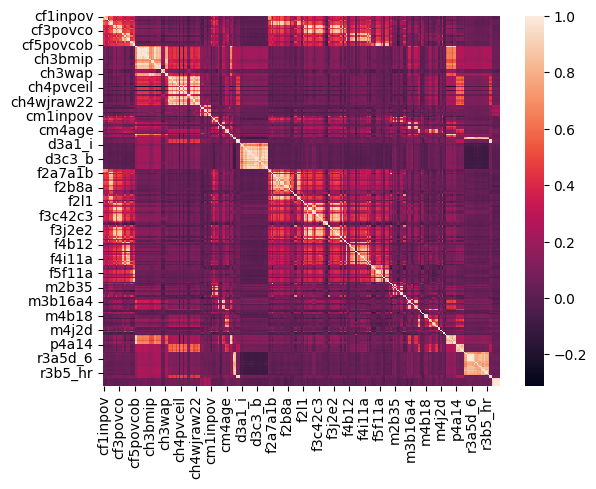

In [ ]:
# heatmap df[topvars].corr()
import seaborn as sns

sns.heatmap(df[topvars].corr())


# Get correlation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# get correlation of each feature with target for all target
targets = ['gpa','grit','materialHardship','eviction','layoff','jobTraining']


myvars = {}
for col in numeric_features:
    row = []
    for target in targets:
        corr_value = df[col].corr(df[target])
        corr_value = corr_value if corr_value > 0 else corr_value * -1
        row.append(corr_value)
    myvars[col] = row
        
corrdf = pd.DataFrame(myvars,index=targets).T

<Axes: >

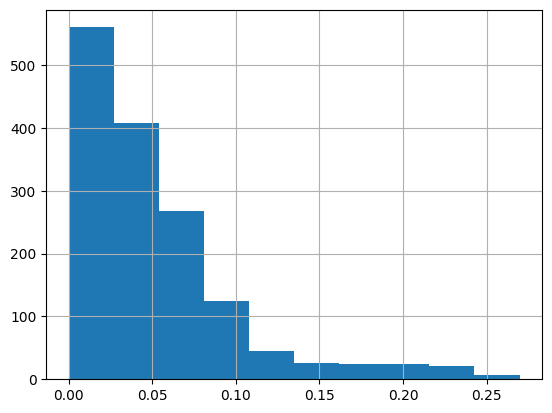

In [ ]:
corrdf.gpa.hist()

<Axes: >

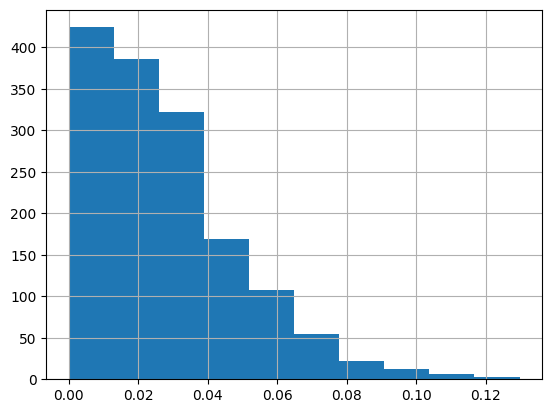

In [ ]:
corrdf.grit.hist()

<Axes: >

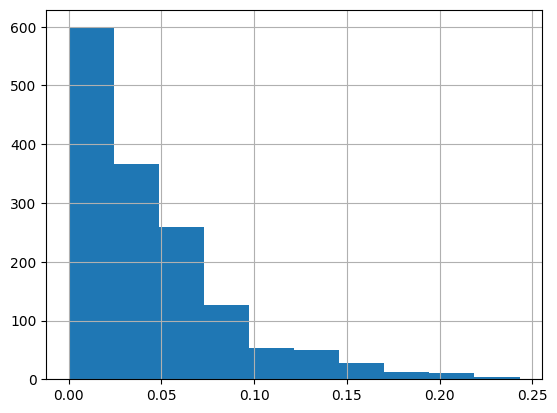

In [ ]:
corrdf.materialHardship.hist()

# Get top correlated

In [ ]:
corrdf

,gpa,grit,materialHardship,eviction,layoff,jobTraining
cf1lenhr,0.004174,0.022897,0.023544,0.039616,0.020946,0.011023
cf1lenmin,0.002362,0.011079,0.010117,0.021258,0.033302,0.005320
f1a6a,0.038499,0.030671,0.037041,0.037448,0.073786,0.007923
cf1age,0.059249,0.009057,0.008371,0.049710,0.020313,0.015136
f1b1a,0.068126,0.027406,0.048996,0.001635,0.069947,0.003909
...,...,...,...,...,...,...
cf5hhinc,0.251330,0.057132,0.196821,0.068118,0.116020,0.076861
cf5hhincb,0.257107,0.048012,0.208917,0.065023,0.110143,0.091570
cm5povco,0.170375,0.007083,0.144594,0.042337,0.071955,0.100931
cf5povco,0.176139,0.047276,0.128309,0.016720,0.053930,0.055181


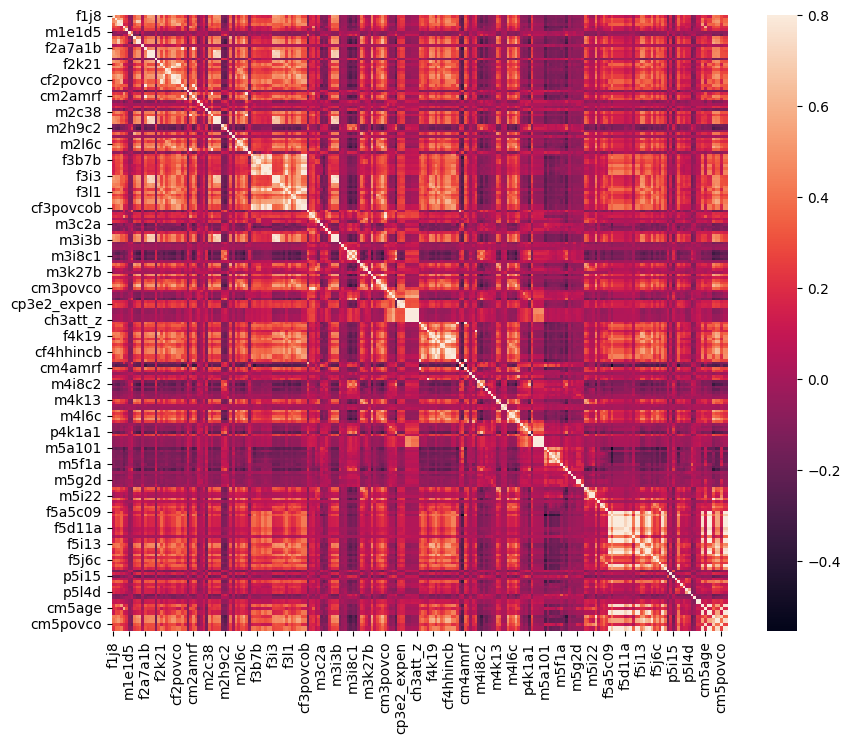

In [ ]:
# get only rows with correlation > 0.1 in any target
top = corrdf[corrdf.max(axis=1) > 0.1]

matrix = df[top.index].corr()

# heatmap
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matrix, vmax=.8, square=True);